In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


Our aim is to examine Pandas Foundation and Manipulating Data Frames with Pandas

In [2]:
data = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
data.head()  # see first 5 rows

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Let's build data frames from scratch
* We can build data frames from csv as we did above.
* Also we can build dataframe from dictionaries
* We can use zip() method to returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
* Adding new column
* Broadcasting: Create new column and assign a value to entire column

In [3]:
# Let's create three different lists.
team = ["Fenerbahce","Galatasaray"]
team_value = ["150M","180M"]
list_label = ["team","team_value"]
list_col = [team,team_value]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,team,team_value
0,Fenerbahce,150M
1,Galatasaray,180M


We can add new columns.

In [4]:
# Add new columns
df["Player_Number"] = ["25","23"]
df

,team,team_value,Player_Number
0,Fenerbahce,150M,25
1,Galatasaray,180M,23


In [5]:
# Broadcasting
df["Expenses"] = 100000000 #Broadcasting entire column
df

,team,team_value,Player_Number,Expenses
0,Fenerbahce,150M,25,100000000
1,Galatasaray,180M,23,100000000


Let's visualise our dataset.

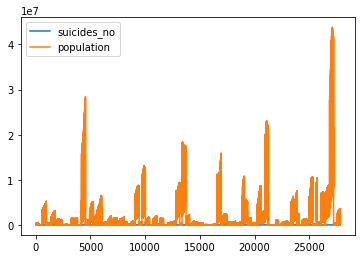

In [6]:
# Plotting all data 
data1 = data.loc[:,["suicides_no","population"]]
data1.plot()
plt.show()
# So confusing

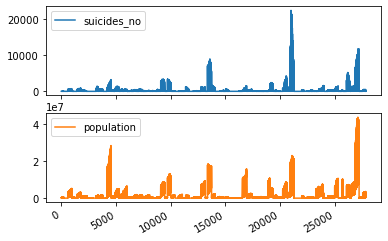

In [7]:
# subplots
data1.plot(subplots = True)
plt.show()

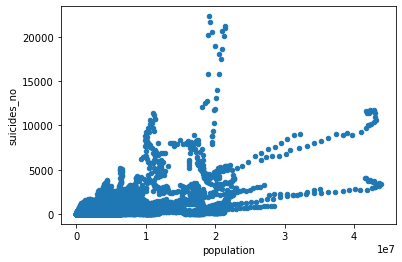

In [8]:
# scatter plot  
data1.plot(kind = "scatter",x="population",y = "suicides_no")
plt.show()

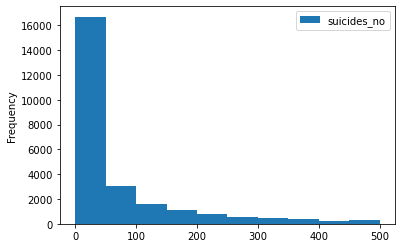

In [9]:
# hist plot  
data1.plot(kind = "hist",y = "suicides_no",range= (0,500),bins = 10)

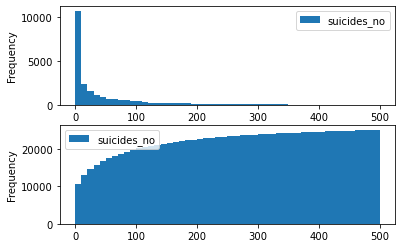

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "suicides_no",bins = 50,range= (0,500),ax = axes[0])
data1.plot(kind = "hist",y = "suicides_no",bins = 50,range= (0,500),ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt.show()

STATISTICAL EXPLORATORY DATA ANALYSIS

In [11]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


INDEXING PANDAS TIME SERIES

In [12]:
time_list = ["1985-01-01","2016-12-31"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [13]:
# close warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1987-01-01","1987-02-01","1987-03-01","1987-04-01","1987-05-01"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
date,,,,,,,,,,,,
1987-01-01,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1987-02-01,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
1987-03-01,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
1987-04-01,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
1987-05-01,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [14]:
print(data2.loc["1987-01-01"])
print(data2.loc["1987-01-01":"1987-03-01"])

country                     Albania
year                           1987
sex                            male
age                     15-24 years
suicides_no                      21
population                   312900
suicides/100k pop              6.71
country-year            Albania1987
HDI for year                    NaN
 gdp_for_year ($)     2,156,624,900
gdp_per_capita ($)              796
generation             Generation X
Name: 1987-01-01 00:00:00, dtype: object
            country  year     sex          age  suicides_no  population  \
date                                                                      
1987-01-01  Albania  1987    male  15-24 years           21      312900   
1987-02-01  Albania  1987    male  35-54 years           16      308000   
1987-03-01  Albania  1987  female  15-24 years           14      289700   

            suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
date                                                                    

RESAMPLING PANDAS TIME SERIES
* Resampling: statistical method over different time intervals
* Needs string to specify frequency like "M" = month or "A" = year
* Downsampling: reduce date time rows to slower frequency like from daily to weekly
* Upsampling: increase date time rows to faster frequency like from daily to hourly
* Interpolate: Interpolate values according to different methods like ‘linear’, ‘time’ or index’

In [15]:
# We will use data2 that we create at previous part
data2.resample("A").mean()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
date,,,,,,
1987-12-31,1987.0,12.2,241340.0,4.92,NaN,796.0


In [16]:
# Lets resample with month
data2.resample("M").mean()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
date,,,,,,
1987-01-31,1987,21,312900,6.71,NaN,796
1987-02-28,1987,16,308000,5.19,NaN,796
1987-03-31,1987,14,289700,4.83,NaN,796
1987-04-30,1987,1,21800,4.59,NaN,796
1987-05-31,1987,9,274300,3.28,NaN,796


In [17]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
date,,,,,,,,,,,,
1987-01-31,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1987-02-28,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
1987-03-31,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
1987-04-30,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
1987-05-31,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [18]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
date,,,,,,
1987-01-31,1987,21,312900,6.71,NaN,796
1987-02-28,1987,16,308000,5.19,NaN,796
1987-03-31,1987,14,289700,4.83,NaN,796
1987-04-30,1987,1,21800,4.59,NaN,796
1987-05-31,1987,9,274300,3.28,NaN,796


Let's manipulate DATA FRAMES WITH PANDAS

In [19]:
# read data
data = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
data= data.set_index("year")
data.head()

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,,,
1987,Albania,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1987,Albania,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
1987,Albania,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
1987,Albania,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
1987,Albania,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [20]:
# indexing using square brackets
data["sex"][1987]

1987      male
1987      male
1987    female
1987      male
1987      male
         ...  
1987    female
1987    female
1987    female
1987    female
1987      male
Name: sex, Length: 648, dtype: object

In [21]:
# using column attribute and row label
data.sex[1987]

1987      male
1987      male
1987    female
1987      male
1987      male
         ...  
1987    female
1987    female
1987    female
1987    female
1987      male
Name: sex, Length: 648, dtype: object

In [22]:
# using loc accessor
data.loc[1987,["sex"]]

,sex
year,
1987,male
1987,male
1987,female
1987,male
1987,male
...,...
1987,female
1987,female
1987,female


In [23]:
# Selecting only some columns
data[["sex","age"]]

,sex,age
year,,
1987,male,15-24 years
1987,male,35-54 years
1987,female,15-24 years
1987,male,75+ years
1987,male,25-34 years
...,...,...
2014,female,35-54 years
2014,female,75+ years
2014,male,5-14 years


SLICING DATA FRAME

In [24]:
# Difference between selecting columns: series and dataframes
print(type(data["sex"]))     # series
print(type(data[["sex"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [25]:
# Slicing and indexing series
data.loc[:,"sex":"suicides_no"]

,sex,age,suicides_no
year,,,
1987,male,15-24 years,21
1987,male,35-54 years,16
1987,female,15-24 years,14
1987,male,75+ years,1
1987,male,25-34 years,9
...,...,...,...
2014,female,35-54 years,107
2014,female,75+ years,9
2014,male,5-14 years,60


In [26]:
data.loc[::-1,"sex":"suicides_no"]

,sex,age,suicides_no
year,,,
2014,female,55-74 years,21
2014,female,5-14 years,44
2014,male,5-14 years,60
2014,female,75+ years,9
2014,female,35-54 years,107
...,...,...,...
1987,male,25-34 years,9
1987,male,75+ years,1
1987,female,15-24 years,14


FILTERING DATA FRAMES

In [27]:
boolean = data.suicides_no > 100
data[boolean]

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,,,
1985,Argentina,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
1985,Argentina,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
1985,Argentina,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
1985,Argentina,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
1985,Argentina,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
2014,Uzbekistan,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
2014,Uzbekistan,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
2014,Uzbekistan,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials


In [28]:
first_filter = data.suicides_no > 200
second_filter = data.population > 1000000
data[first_filter & second_filter]

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,,,
1985,Argentina,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
1985,Argentina,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
1985,Argentina,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
1986,Argentina,male,55-74 years,530,2008300,26.39,Argentina1986,NaN,"110,934,442,763",4072,G.I. Generation
1986,Argentina,male,35-54 years,478,3365200,14.20,Argentina1986,NaN,"110,934,442,763",4072,Silent
...,...,...,...,...,...,...,...,...,...,...,...
2013,Uzbekistan,male,15-24 years,320,3171202,10.09,Uzbekistan2013,0.672,"57,690,453,461",2150,Millenials
2014,Uzbekistan,male,35-54 years,519,3421300,15.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
2014,Uzbekistan,male,25-34 years,318,2739150,11.61,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials


TRANSFORMING DATA

In [29]:
# Plain python functions
def div(n):
    return n/2
data.suicides_no.apply(div)

year
1987    10.5
1987     8.0
1987     7.0
1987     0.5
1987     4.5
        ... 
2014    53.5
2014     4.5
2014    30.0
2014    22.0
2014    10.5
Name: suicides_no, Length: 27820, dtype: float64

In [30]:
# Or we can use lambda function
data.suicides_no.apply(lambda n : n/2)

year
1987    10.5
1987     8.0
1987     7.0
1987     0.5
1987     4.5
        ... 
2014    53.5
2014     4.5
2014    30.0
2014    22.0
2014    10.5
Name: suicides_no, Length: 27820, dtype: float64

In [31]:
# Defining column using other columns
data["Ratio"] = data.population / data.suicides_no
data.head()

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Ratio
year,,,,,,,,,,,,
1987,Albania,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,14900.000000
1987,Albania,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,19250.000000
1987,Albania,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,20692.857143
1987,Albania,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,21800.000000
1987,Albania,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,30477.777778


In [32]:
# our index name is this:
print(data.index.name)
# lets change it
data.index.name = "index_name"
data.head()

year


,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Ratio
index_name,,,,,,,,,,,,
1987,Albania,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,14900.000000
1987,Albania,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,19250.000000
1987,Albania,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,20692.857143
1987,Albania,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,21800.000000
1987,Albania,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,30477.777778


HIERARCHICAL INDEXING

In [33]:
# lets read data frame one more time to start from beginning
data = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
data.head()
# As you can see there is index. However we want to set one or more column to be index

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [34]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["country","sex"]) 
data1.head(100)
# data1.loc["Fire","Flying"] # howw to use indexes

year          age  suicides_no  population  suicides/100k pop  \
country sex                                                                     
Albania male    1987  15-24 years           21      312900               6.71   
        male    1987  35-54 years           16      308000               5.19   
        female  1987  15-24 years           14      289700               4.83   
        male    1987    75+ years            1       21800               4.59   
        male    1987  25-34 years            9      274300               3.28   
...              ...          ...          ...         ...                ...   
        female  1996   5-14 years            1      354100               0.28   
        male    1997  25-34 years           36      236000              15.25   
        male    1997  15-24 years           33      244400              13.50   
        male    1997    75+ years            3       25400              11.81   
        male    1997  35-54 years           30      380800               7.88   

               country-year  HDI for year  gdp_for_year ($)   \
country sex                                                    
Albania male    Albania1987           NaN      2,156,624,900   
        male    Albania1987           NaN      2,156,624,900   
        female  Albania1987           NaN      2,156,624,900   
        male    Albania1987           NaN      2,156,624,900   
        male    Albania1987           NaN      2,156,624,900   
...                     ...           ...                ...   
        female  Albania1996           NaN      3,314,898,292   
        male    Albania1997           NaN      2,359,903,108   
        male    Albania1997           NaN      2,359,903,108   
        male    Albania1997           NaN      2,359,903,108   
        male    Albania1997           NaN      2,359,903,108   

                gdp_per_capita ($)       generation  
country sex                                          
Albania male                   796     Generation X  
        male                   796           Silent  
        female                 796     Generation X  
        male                   796  G.I. Generation  
        male                   796          Boomers  
...                            ...              ...  
        female                1127       Millenials  
        male                   793     Generation X  
        male                   793     Generation X  
        male                   793  G.I. Generation  
        male                   793          Boomers  

[100 rows x 10 columns]